# **Simple K-NN**

## The pakages I use

In [1]:
import numpy as np
import math
import operator
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import Normalizer
sb.set_style("dark")
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import time

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
'''
EulidianDistance
'''
def euclidianDistance(list1, list2):
    distance = 0
    for x in range(len(list1)):
        distance += pow(list1[x] - list2[x], 2)
    return math.sqrt(distance)
'''
ManhattenDistance
'''
def manhattenDistance(list1, list2):
    distance = 0
    for x in range(len(list1)):
        distance += abs(list1[x] - list2[x])
    return distance
'''
ChebyshevDistance
'''
def chebyshevDistance(list1, list2):
    distance = 0
    for x in range(len(list1)):
        distance = max(distance,abs(list1[x] - list2[x]))
    return distance
       
'''
    calculate the distance using 3 diffirent functions
    return the top k neighbors
'''
def getNeighbors(train_set,y_train,test_sample, k, function =1):
    #1 = EulidianDistance 2 = ManhattenDistance 3 = ChebyshevDistance
    distances = []
    neighbors = []

    for x in range(len(train_set)):
        if(function==1):
            dist = euclidianDistance(test_sample, train_set[x])
        elif(function==2):
            dist = manhattenDistance(test_sample, train_set[x])
        elif(function==3):
            dist = chebyshevDistance(test_sample, train_set[x])
        else:
            dist = 0;
        
        distances.append((y_train[x], dist))

    distances.sort(key=operator.itemgetter(1))
    #print(distances)

    for x in range(k):
        neighbors.append(distances[x][0])

    return neighbors

def getLabel(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(),key=lambda kv: kv[1],reverse = True)
    return sortedVotes[0][0]

'''
    calculates the accuarcy of predictions by taking
    a ratio of total correct prediction out of all predictions
'''
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x] == predictions[x]:
            correct += 1
    return round((correct/float(len(testSet))) * 100.0, 3)

def knn(k, X_train,X_test,y_train,y_test,function=1):
    #X= features y= outcome
    #1 = EulidianDistance 2 = ManhattenDistance 3 = ChebyshevDistance
    if(function==1):
        distanceType="Eulidian Distance"
    elif(function==2):
        distanceType="Manhatten Distance"
    elif(function==3):
        distanceType="Chebyshev Distance"
    else:
        distanceType = "error"
    print('*******************************************')
    print('************    K = ', k , '  *************')
    print('******   Distance = ',distanceType,'*******')
    predictions = []

    print('--> Calculating KNN...')
    for test_sample in X_test:
        neighbors = getNeighbors(X_train, y_train,test_sample, k,function)
        neighbors_prediction = getLabel(neighbors)
        predictions.append(neighbors_prediction)
        
    print(predictions)    
    print('--> Calculating Accuracy...')
    accuracy = getAccuracy(y_test,predictions)
    print('Accuracy = ', accuracy, '%')
    
    return predictions

In [3]:
%%time
train_df=pd.read_csv("../input/digit-recognizer/train.csv")
test_df=pd.read_csv("../input/digit-recognizer/test.csv")

CPU times: user 4.99 s, sys: 1.16 s, total: 6.15 s
Wall time: 6.18 s


In [4]:
train_df.isnull().sum().describe()

count    785.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [5]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
train_df.shape

(42000, 785)

In [7]:
target=train_df['label']
train_df=train_df.drop('label',axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


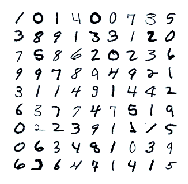

In [8]:
figure(figsize(3,3))
for digit_num in range(0,81):
    subplot(9,9,digit_num+1)
    grid_data = train_df.iloc[digit_num].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "bone_r")
    xticks([])
    yticks([])

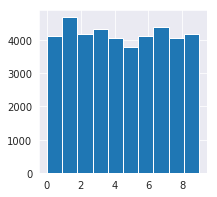

In [9]:
target.hist()

## Scaling the data
 
As the data have very different range of value, we need to scal the data to make it easy to train.

In [10]:
norm = Normalizer().fit(train_df)
train_df = norm.transform(train_df)
test_df = norm.transform(test_df)

In [11]:
train_df = pd.DataFrame(train_df)
test_df= pd.DataFrame(test_df)

In [12]:
pca = PCA(n_components=784, random_state=0, svd_solver='randomized')
pca.fit(train_df)

PCA(copy=True, iterated_power='auto', n_components=784, random_state=0,
    svd_solver='randomized', tol=0.0, whiten=False)

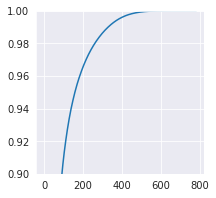

In [13]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(0.9, 1.0)
plt.grid()

From the PCA , we can compress the data set as only 100 features can represent 92% of the data set.

In [14]:
def pca(X_tr, X_ts, test,n):
    pca = PCA(n)
    pca.fit(X_tr)
    X_tr_pca = pca.transform(X_tr)
    X_ts_pca = pca.transform(X_ts)
    test_pca = pca.transform(test)
    return X_tr_pca, X_ts_pca, test_pca

In [15]:
X_train, X_test, y_train, y_test = train_test_split(train_df, target,
    test_size=0.1, random_state=2)

In [16]:
test_num=y_test[(y_test==8)].index
num=len(test_num)

In [17]:
X_num8_test=X_test.loc[test_num]

In [18]:
%%time
X_train_pca, X_test_pca,test_num8_pca = pca(X_train, X_test, X_num8_test,100)
#print (type(X_train_pca))

CPU times: user 4.86 s, sys: 492 ms, total: 5.35 s
Wall time: 3.16 s


In [19]:
%%time
nX_train  = pd.DataFrame(X_train_pca).values.tolist()
nX_test  = pd.DataFrame(X_test_pca).values.tolist()
ny_train  = y_train.values.tolist()
ny_test  = y_test.values.tolist()


pred = knn(5,nX_train,nX_test,ny_train,ny_test,2)

#model = KNeighborsClassifier(n_neighbors = 5, weights='distance')
#model.fit(X_train_pca, y_train)
#score = model.score(X_test_pca, y_test)
#print ('KNN ', score)
#pred = model.predict(X_test_pca)


CPU times: user 53 s, sys: 48 ms, total: 53 s
Wall time: 53 s


The confusion matrix is :

In [20]:
confusion_matrix(y_test,pred)

array([[410,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 481,   1,   1,   0,   0,   0,   1,   1,   0],
       [  2,   0, 396,   0,   0,   0,   2,   1,   1,   1],
       [  0,   1,   1, 404,   0,   4,   0,   0,   7,   1],
       [  0,   2,   0,   0, 447,   0,   3,   1,   0,   8],
       [  2,   0,   0,   3,   0, 357,   5,   0,   2,   3],
       [  4,   1,   0,   0,   0,   1, 407,   0,   0,   0],
       [  1,   4,   3,   0,   1,   0,   0, 428,   0,   9],
       [  0,   4,   1,   2,   0,   1,   1,   1, 367,   5],
       [  2,   0,   0,   2,   3,   1,   0,   2,   0, 399]])

## The number 8's accuracy change with the i

In [21]:
y_8=[8]*num

In [22]:
%%time
x_axis = [x for x in range(1,21)]
y_axis = []
scores = []
for i in range(1,21):
    model=KNeighborsClassifier(n_neighbors = i, weights='distance')
    model.fit(X_train_pca, y_train)
    score = model.score(test_num8_pca , y_8)
    scores.append((i,score))
    y_axis.append(score)
    print ('The accuracy of number 8''s {}NN score is :{} '.format(i,score))


The accuracy of number 8s 1NN score is :0.9581151832460733 
The accuracy of number 8s 2NN score is :0.9581151832460733 
The accuracy of number 8s 3NN score is :0.9554973821989529 
The accuracy of number 8s 4NN score is :0.9581151832460733 
The accuracy of number 8s 5NN score is :0.9607329842931938 
The accuracy of number 8s 6NN score is :0.9581151832460733 
The accuracy of number 8s 7NN score is :0.9607329842931938 
The accuracy of number 8s 8NN score is :0.9581151832460733 
The accuracy of number 8s 9NN score is :0.9581151832460733 
The accuracy of number 8s 10NN score is :0.9607329842931938 
The accuracy of number 8s 11NN score is :0.9502617801047121 
The accuracy of number 8s 12NN score is :0.9554973821989529 
The accuracy of number 8s 13NN score is :0.9528795811518325 
The accuracy of number 8s 14NN score is :0.9528795811518325 
The accuracy of number 8s 15NN score is :0.9528795811518325 
The accuracy of number 8s 16NN score is :0.9554973821989529 
The accuracy of number 8s 17NN sc

when k = 5, the accuracy is the highest.


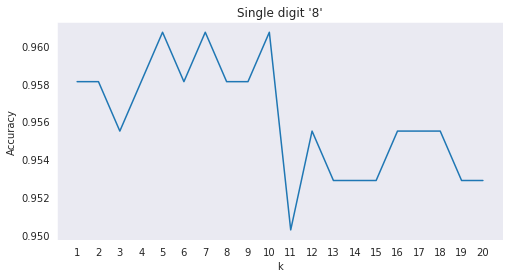

In [23]:
plt.figure(figsize=(8,4))
plt.plot(x_axis,y_axis)
plt.xticks(x_axis)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Single digit '8'")

scores.sort(key=operator.itemgetter(1),reverse = True)
print ('when k = {}, the accuracy is the highest.'.format(scores[0][0]))